In [2]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from UsefulFunctions import LinReg
from UsefulFunctions import ScatPlotandReg
from UsefulFunctions import ScatPlotNoReg

# Import Cleaned Data

In [4]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
census_data = pd.read_csv("censusData/ageAndSex.csv")
income = pd.read_csv("censusData/income.csv")
medicaid_data = pd.read_csv("cleanedData/medicadeAggregate.csv")
clea_census_data = pd.read_csv("cleanedData/medicarePopulation.csv")
medicare_data = pd.read_csv("cleanedData/medicareEnroll.csv")
# Display sample data for census
census_data.head(10)

,Acsst5Y2010.S0101-Data.1.2,Geography,Geographic Area Name,Total Estimate Total Population,Male Estimate Total Population,Female Estimate Total Population,Total Estimate Age Under 5 Years,Male Estimate Age Under 5 Years,Female Estimate Age Under 5 Years,Total Estimate Age 5 To 9 Years,...,Female Estimate Summary Indicators Age Dependency Ratio Old-Age Dependency Ratio,Total Estimate Summary Indicators Age Dependency Ratio Child Dependency Ratio,Male Estimate Summary Indicators Age Dependency Ratio Child Dependency Ratio,Female Estimate Summary Indicators Age Dependency Ratio Child Dependency Ratio,Total Estimate Percent Imputed Sex,Male Estimate Percent Imputed Sex,Female Estimate Percent Imputed Sex,Total Estimate Percent Imputed Age,Male Estimate Percent Imputed Age,Female Estimate Percent Imputed Age
0,2010,0400000US01,Alabama,4712651.0,2285905.0,2426746.0,6.4,6.7,6.1,6.6,...,(X),38.4,(X),(X),0.2,(X),(X),1.0,(X),(X)
1,2010,0400000US02,Alaska,691189.0,358919.0,332270.0,7.4,7.4,7.4,7.2,...,(X),40.6,(X),(X),0.1,(X),(X),1.2,(X),(X)
2,2010,0400000US04,Arizona,6246816.0,3108234.0,3138582.0,7.4,7.6,7.2,7.0,...,(X),42.5,(X),(X),0.2,(X),(X),1.2,(X),(X)
3,2010,0400000US05,Arkansas,2872684.0,1408945.0,1463739.0,6.8,7.1,6.5,6.8,...,(X),40.1,(X),(X),0.2,(X),(X),0.6,(X),(X)
4,2010,0400000US06,California,36637290.0,18223157.0,18414133.0,6.9,7.1,6.8,6.8,...,(X),40.1,(X),(X),0.2,(X),(X),1.3,(X),(X)
5,2010,0400000US08,Colorado,4887061.0,2448492.0,2438569.0,7.0,7.1,6.8,6.9,...,(X),37.9,(X),(X),0.2,(X),(X),1.0,(X),(X)
6,2010,0400000US09,Connecticut,3545837.0,1724834.0,1821003.0,5.8,6.1,5.5,6.4,...,(X),37.2,(X),(X),0.2,(X),(X),1.1,(X),(X)
7,2010,0400000US10,Delaware,881278.0,427218.0,454060.0,6.4,6.7,6.1,6.4,...,(X),37.1,(X),(X),0.2,(X),(X),0.9,(X),(X)
8,2010,0400000US11,District of Columbia,584400.0,276101.0,308299.0,5.5,6.0,5.2,4.5,...,(X),24.9,(X),(X),0.2,(X),(X),1.4,(X),(X)
9,2010,0400000US12,Florida,18511620.0,9050155.0,9461465.0,5.8,6.1,5.6,5.8,...,(X),35.3,(X),(X),0.2,(X),(X),1.3,(X),(X)


In [5]:
#print the medicare dataset
medicare_data.head(10)

,State_Name,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Code,Item
0,Alabama,845,864,896,922,947,968,988,1006,11,Medicare Enrollee Population (Thousands)
1,Alaska,66,69,73,76,80,84,88,92,11,Medicare Enrollee Population (Thousands)
2,Arizona,930,962,1009,1051,1096,1140,1180,1224,11,Medicare Enrollee Population (Thousands)
3,Arkansas,531,542,559,572,584,594,607,617,11,Medicare Enrollee Population (Thousands)
4,California,4757,4901,5111,5294,5476,5645,5814,5966,11,Medicare Enrollee Population (Thousands)
5,Colorado,625,650,688,722,755,786,816,840,11,Medicare Enrollee Population (Thousands)
6,Connecticut,568,577,595,608,619,630,642,654,11,Medicare Enrollee Population (Thousands)
7,Delaware,149,154,161,168,175,181,187,193,11,Medicare Enrollee Population (Thousands)
8,District of Columbia,78,80,82,84,87,88,90,91,11,Medicare Enrollee Population (Thousands)
9,Florida,3375,3472,3621,3757,3900,4040,4164,4289,11,Medicare Enrollee Population (Thousands)


In [6]:
#Rename the columns for medicare data
medicare_data.columns = medicare_data.columns.str.strip()
medicare_data.rename(columns={
    'State_Name': 'State',
    'Y2010': 'Medicare 2010',
    'Y2011': 'Medicare 2011',
    'Y2012': 'Medicare 2012',
    'Y2013': 'Medicare 2013',
    'Y2014': 'Medicare 2014',
    'Y2015': 'Medicare 2015',
    'Y2016': 'Medicare 2016',
    'Y2017': 'Medicare 2017',


    }, inplace=True)
medicare_data.head(10)

,State,Medicare 2010,Medicare 2011,Medicare 2012,Medicare 2013,Medicare 2014,Medicare 2015,Medicare 2016,Medicare 2017,Code,Item
0,Alabama,845,864,896,922,947,968,988,1006,11,Medicare Enrollee Population (Thousands)
1,Alaska,66,69,73,76,80,84,88,92,11,Medicare Enrollee Population (Thousands)
2,Arizona,930,962,1009,1051,1096,1140,1180,1224,11,Medicare Enrollee Population (Thousands)
3,Arkansas,531,542,559,572,584,594,607,617,11,Medicare Enrollee Population (Thousands)
4,California,4757,4901,5111,5294,5476,5645,5814,5966,11,Medicare Enrollee Population (Thousands)
5,Colorado,625,650,688,722,755,786,816,840,11,Medicare Enrollee Population (Thousands)
6,Connecticut,568,577,595,608,619,630,642,654,11,Medicare Enrollee Population (Thousands)
7,Delaware,149,154,161,168,175,181,187,193,11,Medicare Enrollee Population (Thousands)
8,District of Columbia,78,80,82,84,87,88,90,91,11,Medicare Enrollee Population (Thousands)
9,Florida,3375,3472,3621,3757,3900,4040,4164,4289,11,Medicare Enrollee Population (Thousands)


In [7]:
# Print the existing columns in medicare data set
for col in medicare_data.columns:
    print(col)

State
Medicare 2010
Medicare 2011
Medicare 2012
Medicare 2013
Medicare 2014
Medicare 2015
Medicare 2016
Medicare 2017
Code
Item


In [8]:
# Frame each year per state on separatly with columns state and year
medicare_data.columns = medicare_data.columns.str.replace(' +', ' ', regex=True).str.strip()

# Select the relevant columns
year_medicare_data_2010 = medicare_data[["State", "Medicare 2010"]]
year_medicare_data_2011 = medicare_data[["State", "Medicare 2011"]]
year_medicare_data_2012 = medicare_data[["State", "Medicare 2012"]]
year_medicare_data_2013 = medicare_data[["State", "Medicare 2013"]]
year_medicare_data_2014 = medicare_data[["State", "Medicare 2014"]]
year_medicare_data_2015 = medicare_data[["State", "Medicare 2015"]]
year_medicare_data_2016 = medicare_data[["State", "Medicare 2016"]]
year_medicare_data_2017 = medicare_data[["State", "Medicare 2017"]]

# Show the resulting DataFrame
year_medicare_data_2010.head(10)


,State,Medicare 2010
0,Alabama,845
1,Alaska,66
2,Arizona,930
3,Arkansas,531
4,California,4757
5,Colorado,625
6,Connecticut,568
7,Delaware,149
8,District of Columbia,78
9,Florida,3375


In [9]:
# Print the clean census data
clea_census_data.head()

,Unnamed: 0,Acsst5Y2010.S0101-Data.1.2,Geographic Area Name,Total Estimate Total Population,Total Estimate Selected Age Categories 65 Years And Over
0,0,2010,Alabama,4712651.0,636208.0
1,1,2010,Alaska,691189.0,50457.0
2,2,2010,Arizona,6246816.0,830827.0
3,3,2010,Arkansas,2872684.0,405048.0
4,4,2010,California,36637290.0,4066739.0


In [10]:
# clean the data set and rename the columns for visualization 
clea_census_data.columns = clea_census_data.columns.str.strip()
clea_census_data.rename(columns={
    'Acsst5Y2010.S0101-Data.1.2': 'Year',
    'Geographic Area Name': 'State',
    'Total Estimate Total Population': 'Total Population',
    'Total Estimate Selected Age Categories 65 Years And Over': 'Age Categories 65 Years and older'
    }, inplace=True)
clea_census_data

,Unnamed: 0,Year,State,Total Estimate Total Population,Total Estimate Selected Age Categories 65 Years And Over
0,0,2010,Alabama,4712651.0,636208.0
1,1,2010,Alaska,691189.0,50457.0
2,2,2010,Arizona,6246816.0,830827.0
3,3,2010,Arkansas,2872684.0,405048.0
4,4,2010,California,36637290.0,4066739.0
...,...,...,...,...,...
407,414,2017,Virginia,8365952.0,303515.0
408,415,2017,Washington,7169967.0,253125.0
409,416,2017,West Virginia,1836843.0,61792.0
410,417,2017,Wisconsin,5763217.0,205743.0


In [11]:
#print the column names in census data
for col in clea_census_data.columns:
    print(col)

Unnamed: 0
Year
State
Total  Estimate  Total Population
Total  Estimate  Selected Age Categories 65 Years And Over


In [12]:
# Remove the extra space from "Re-infested  Dwelling Unit Count" column
clea_census_data = clea_census_data.rename(
    columns={"Total  Estimate  Total Population": "Total Population", "Total  Estimate  Selected Age Categories 65 Years And Over": "Age Categories 65 Years And Over"})
#cleanup the spaces
clea_census_data.columns = clea_census_data.columns.str.replace(' +', ' ', regex=True).str.strip()


In [13]:
#print the comuns of census data
print(clea_census_data.columns)

# Clean up extra spaces in column names
clea_census_data.columns = clea_census_data.columns.str.replace(' +', ' ', regex=True).str.strip()

# Select the relevant columns
new_census_data = clea_census_data[["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]

# Show the resulting DataFrame
new_census_data

Index(['Unnamed: 0', 'Year', 'State', 'Total Population',
       'Age Categories 65 Years And Over'],
      dtype='object')


,Year,State,Total Population,Age Categories 65 Years And Over
0,2010,Alabama,4712651.0,636208.0
1,2010,Alaska,691189.0,50457.0
2,2010,Arizona,6246816.0,830827.0
3,2010,Arkansas,2872684.0,405048.0
4,2010,California,36637290.0,4066739.0
...,...,...,...,...
407,2017,Virginia,8365952.0,303515.0
408,2017,Washington,7169967.0,253125.0
409,2017,West Virginia,1836843.0,61792.0
410,2017,Wisconsin,5763217.0,205743.0


In [14]:
#Index census data per year
selected_states = new_census_data.iloc[1:10]  # Adjust the range as needed
selected_states
#states_to_select = new_census_data[["State"]]
#states_to_select


,Year,State,Total Population,Age Categories 65 Years And Over
1,2010,Alaska,691189.0,50457.0
2,2010,Arizona,6246816.0,830827.0
3,2010,Arkansas,2872684.0,405048.0
4,2010,California,36637290.0,4066739.0
5,2010,Colorado,4887061.0,513141.0
6,2010,Connecticut,3545837.0,492871.0
7,2010,Delaware,881278.0,122498.0
8,2010,District of Columbia,584400.0,67206.0
9,2010,Florida,18511620.0,3128464.0


In [15]:
#Show the total cells per column in census data
count_states = pd.DataFrame(new_census_data)# YOUR CODE HERE

# Show Record Count
count_states.count()

Year                                412
State                               412
Total Population                    408
Age Categories 65 Years And Over    408
dtype: int64

In [16]:
#print columns in census data
for col in new_census_data.columns:
    print(col)

Year
State
Total Population
Age Categories 65 Years And Over


In [17]:
# drop the nan rows
new_census_data = new_census_data.dropna()
new_census_data.count()

Year                                408
State                               408
Total Population                    408
Age Categories 65 Years And Over    408
dtype: int64

In [18]:
#select data per year in census data
Year_census_data_2010 = new_census_data.loc[new_census_data["Year"] == 2010, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2011 = new_census_data.loc[new_census_data["Year"] == 2011, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2012 = new_census_data.loc[new_census_data["Year"] == 2012, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2013 = new_census_data.loc[new_census_data["Year"] == 2013, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2014 = new_census_data.loc[new_census_data["Year"] == 2014, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2015 = new_census_data.loc[new_census_data["Year"] == 2015, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2016 = new_census_data.loc[new_census_data["Year"] == 2016, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2017 = new_census_data.loc[new_census_data["Year"] == 2017, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]

# Display the filtered DataFrame
Year_census_data_2010.head(5)


,Year,State,Total Population,Age Categories 65 Years And Over
0,2010,Alabama,4712651.0,636208.0
1,2010,Alaska,691189.0,50457.0
2,2010,Arizona,6246816.0,830827.0
3,2010,Arkansas,2872684.0,405048.0
4,2010,California,36637290.0,4066739.0


In [19]:
yearly_counts = {}

# Loop through each year from 2010 to 2017
for year in range(2010, 2018):
    # Filter the data for the current year
    year_data = new_census_data.loc[new_census_data["Year"] == year]
    
    # Count the number of rows (states) for the current year
    year_count = year_data['State'].count()
    
    # Store the count in the dictionary with the year as the key
    yearly_counts[year] = year_count

# Print the yearly counts
for year, count in yearly_counts.items():
    print(f"Year {year}: {count} states")

# If you want to convert this into a DataFrame for further analysis:
yearly_counts_df = pd.DataFrame(list(yearly_counts.items()), columns=['Year', 'Total States'])
yearly_counts_df

Year 2010: 51 states
Year 2011: 51 states
Year 2012: 51 states
Year 2013: 51 states
Year 2014: 51 states
Year 2015: 51 states
Year 2016: 51 states
Year 2017: 51 states


,Year,Total States
0,2010,51
1,2011,51
2,2012,51
3,2013,51
4,2014,51
5,2015,51
6,2016,51
7,2017,51


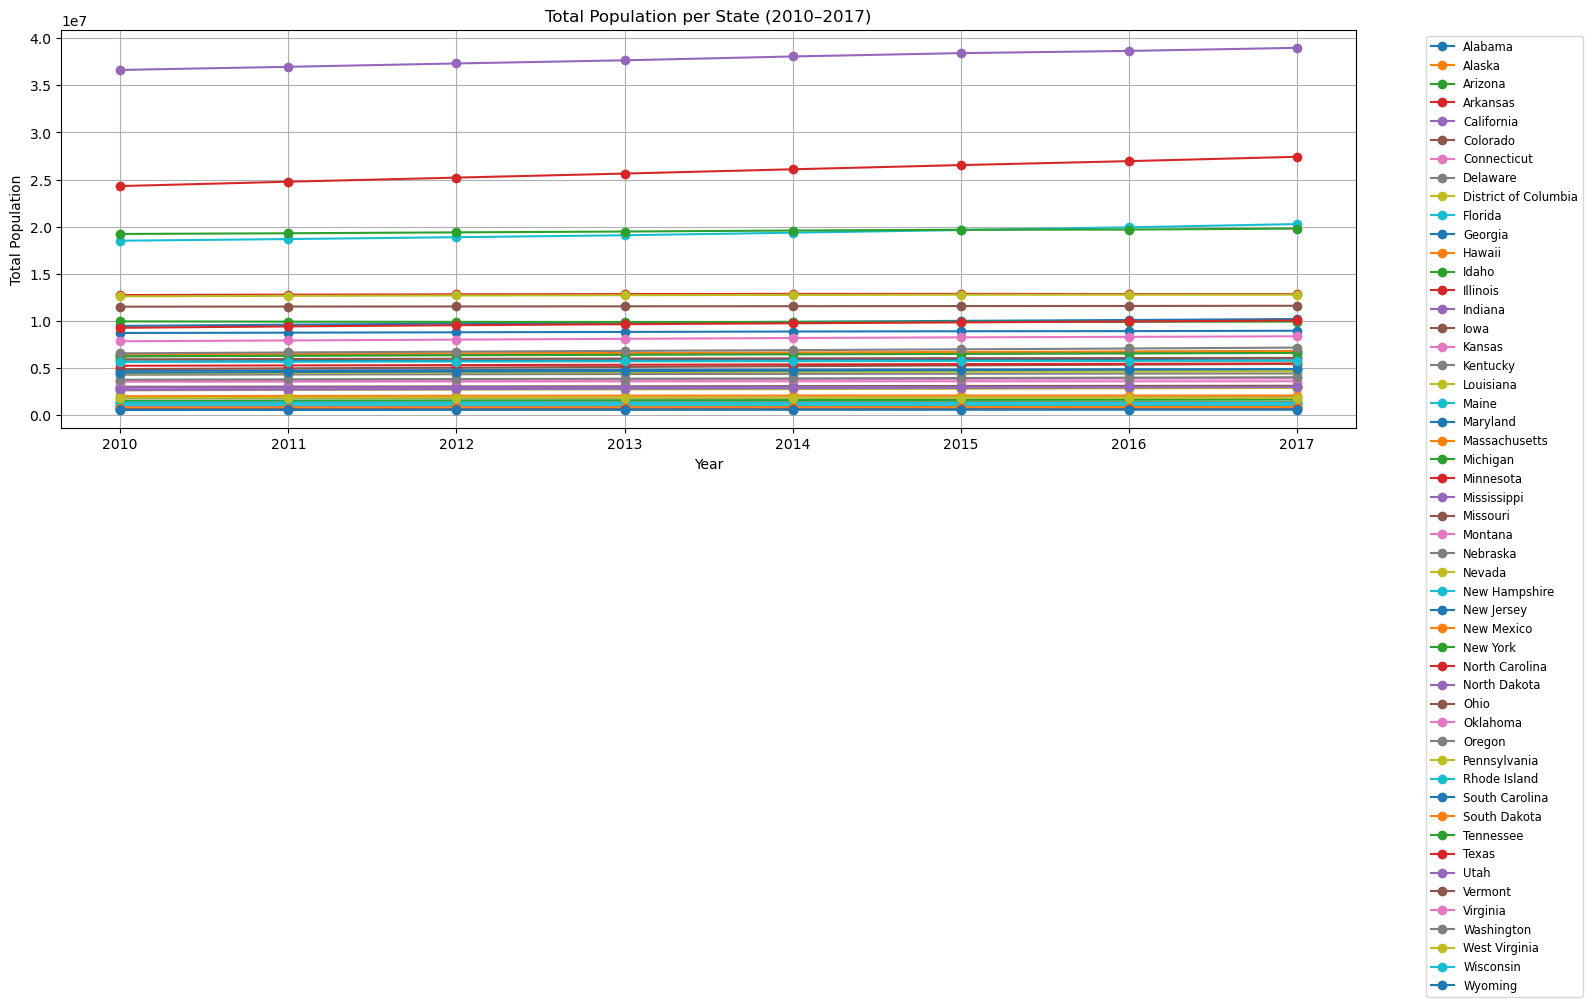

In [20]:
# show the total population per state each year
# Filter data for the years 2010 to 2017
filtered_data = new_census_data[(new_census_data['Year'] >= 2010) & (new_census_data['Year'] <= 2017)]

# Group data by State and Year, then sum the total population for each state per year (if multiple records exist)
grouped_data = filtered_data.groupby(['Year', 'State'])['Total Population'].sum().unstack()

# Create a line plot for each state across the years 2010 to 2017
plt.figure(figsize=(16, 8))

# Plot for each state
for state in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[state], label=state, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population per State (2010–2017)')
plt.xticks(grouped_data.index)  # Ensure years are displayed correctly on the x-axis
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Move legend outside of the graph
plt.grid(True)

# Adjust layout for readability
plt.tight_layout()

# Show the plot
plt.show()

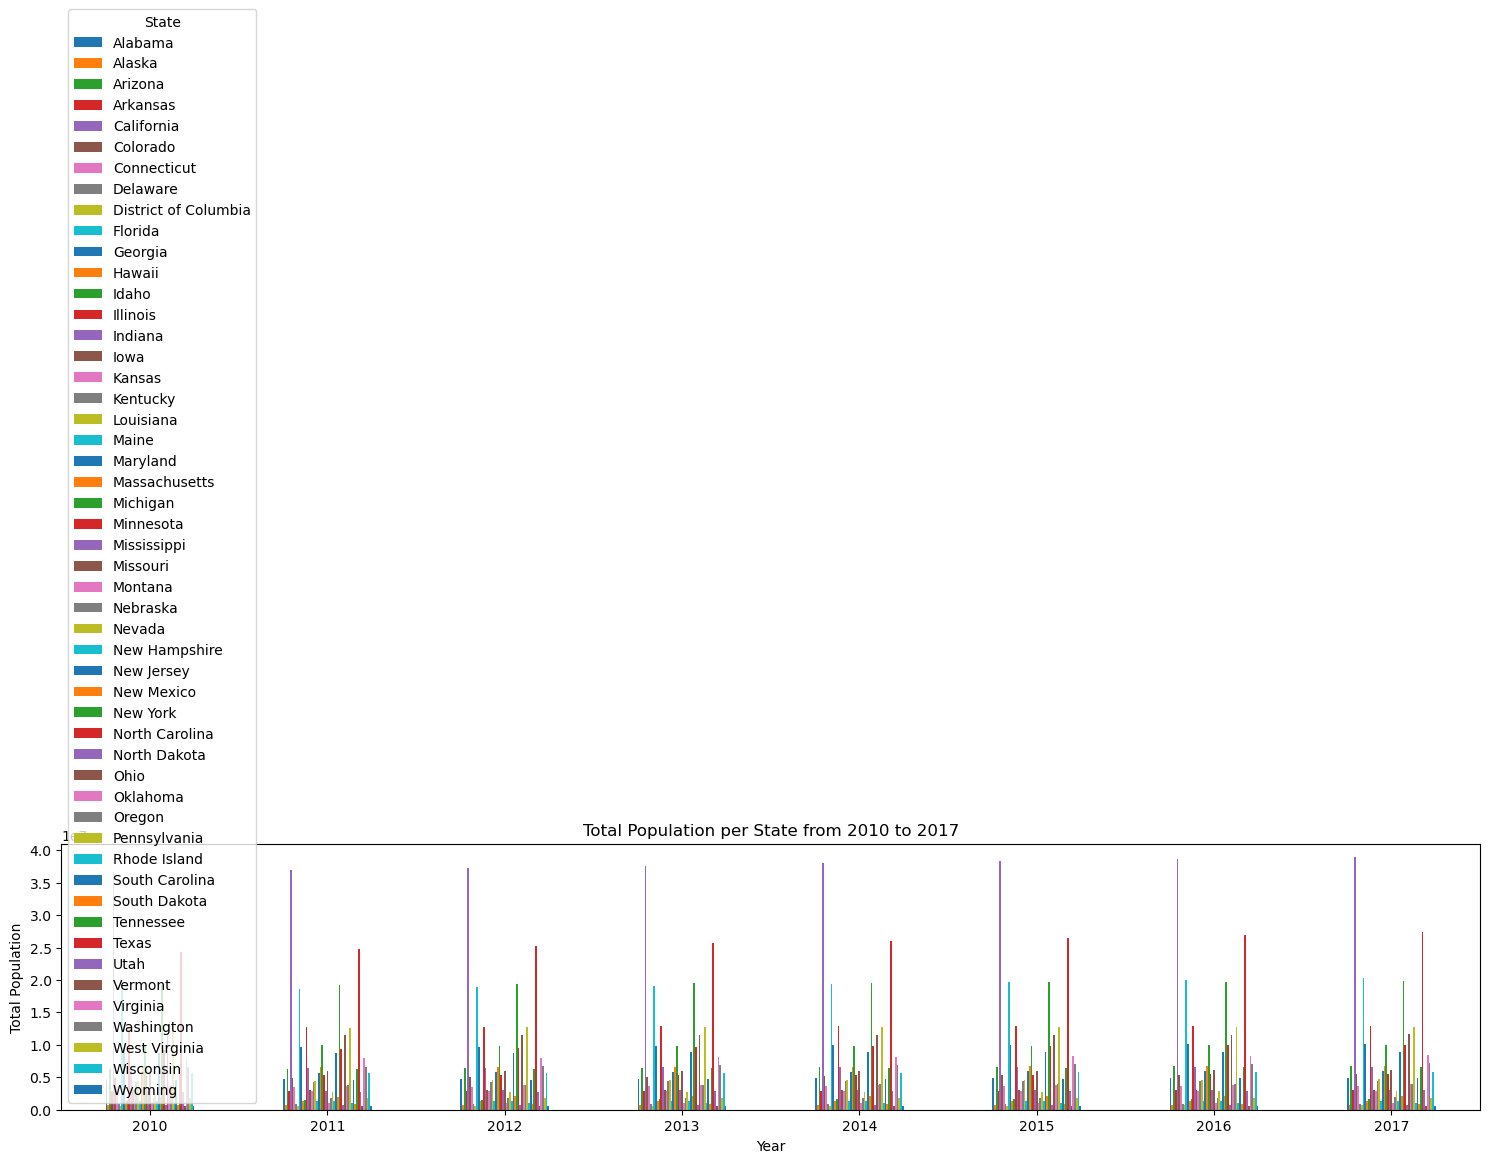

In [21]:
#group the census data per year
grouped_data = new_census_data.groupby(['Year', 'State'])['Total Population'].sum().reset_index()

# Pivot the data so that states are columns and years are rows
pivot_data = grouped_data.pivot(index='Year', columns='State', values='Total Population')

# Create a bar chart for total population per state over the years
pivot_data.plot(kind='bar', stacked=False, figsize=(15, 8))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population per State from 2010 to 2017')

# Optional: Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()  # Adjusts layout to fit everything nicely
plt.show()

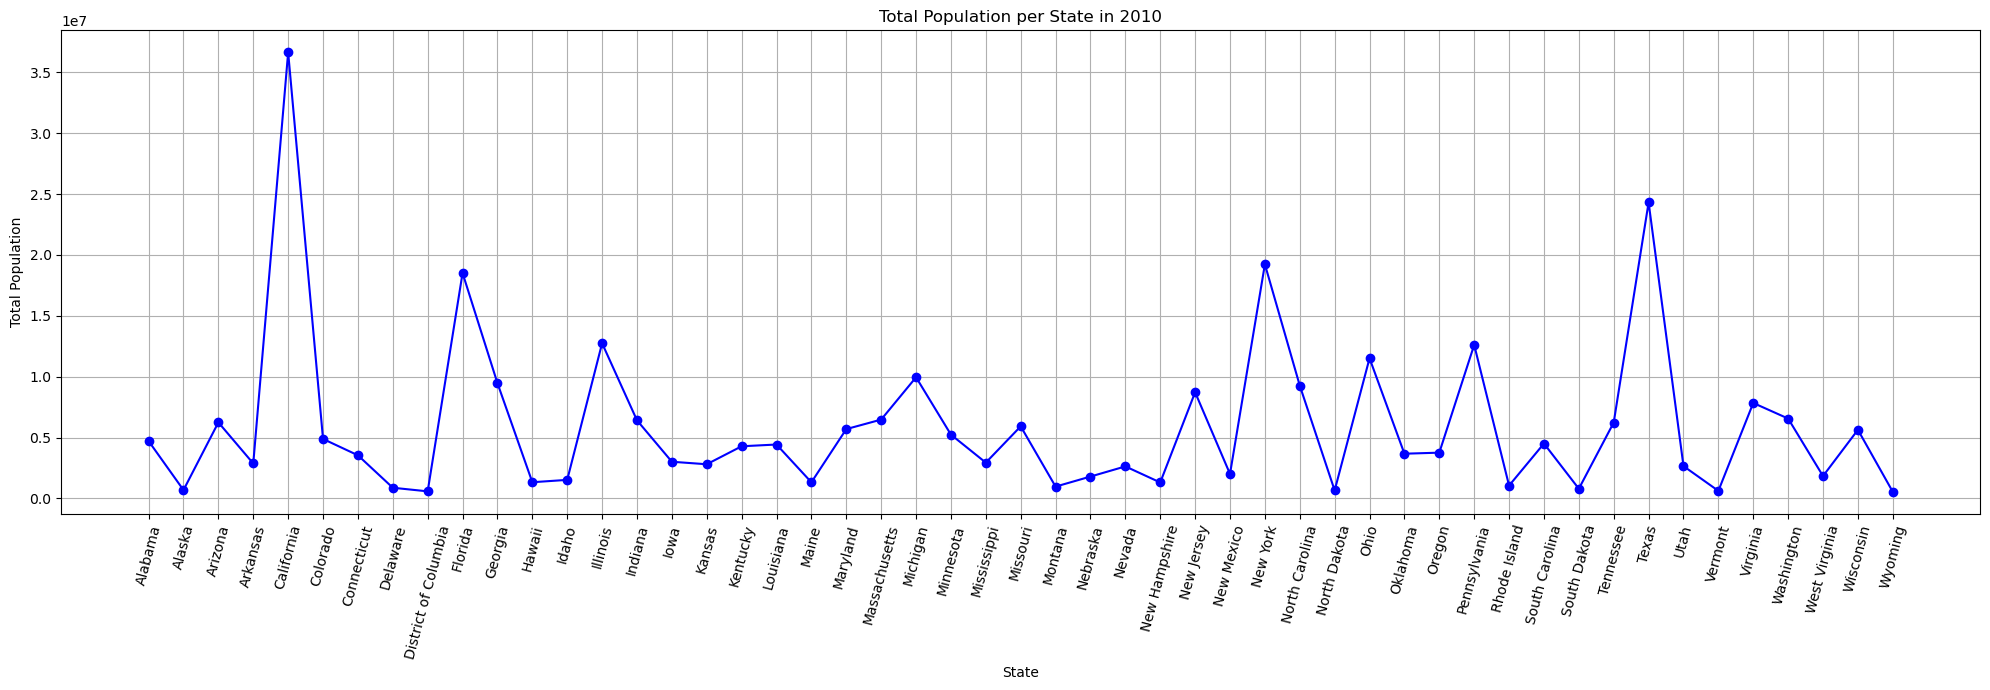

In [22]:
#show the census data in one year out of the 7 with all states
Year_census_data_2010 = pd.DataFrame(Year_census_data_2010)

# Create a line graph for total population per state in 2010
plt.figure(figsize=(20, 7))  # Optional: Adjust figure size

# Plotting the line graph
plt.plot(Year_census_data_2010['State'], Year_census_data_2010['Total Population'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Total Population')
plt.title('Total Population per State in 2010')

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjusts layout to make room for the x-axis labels
plt.show()

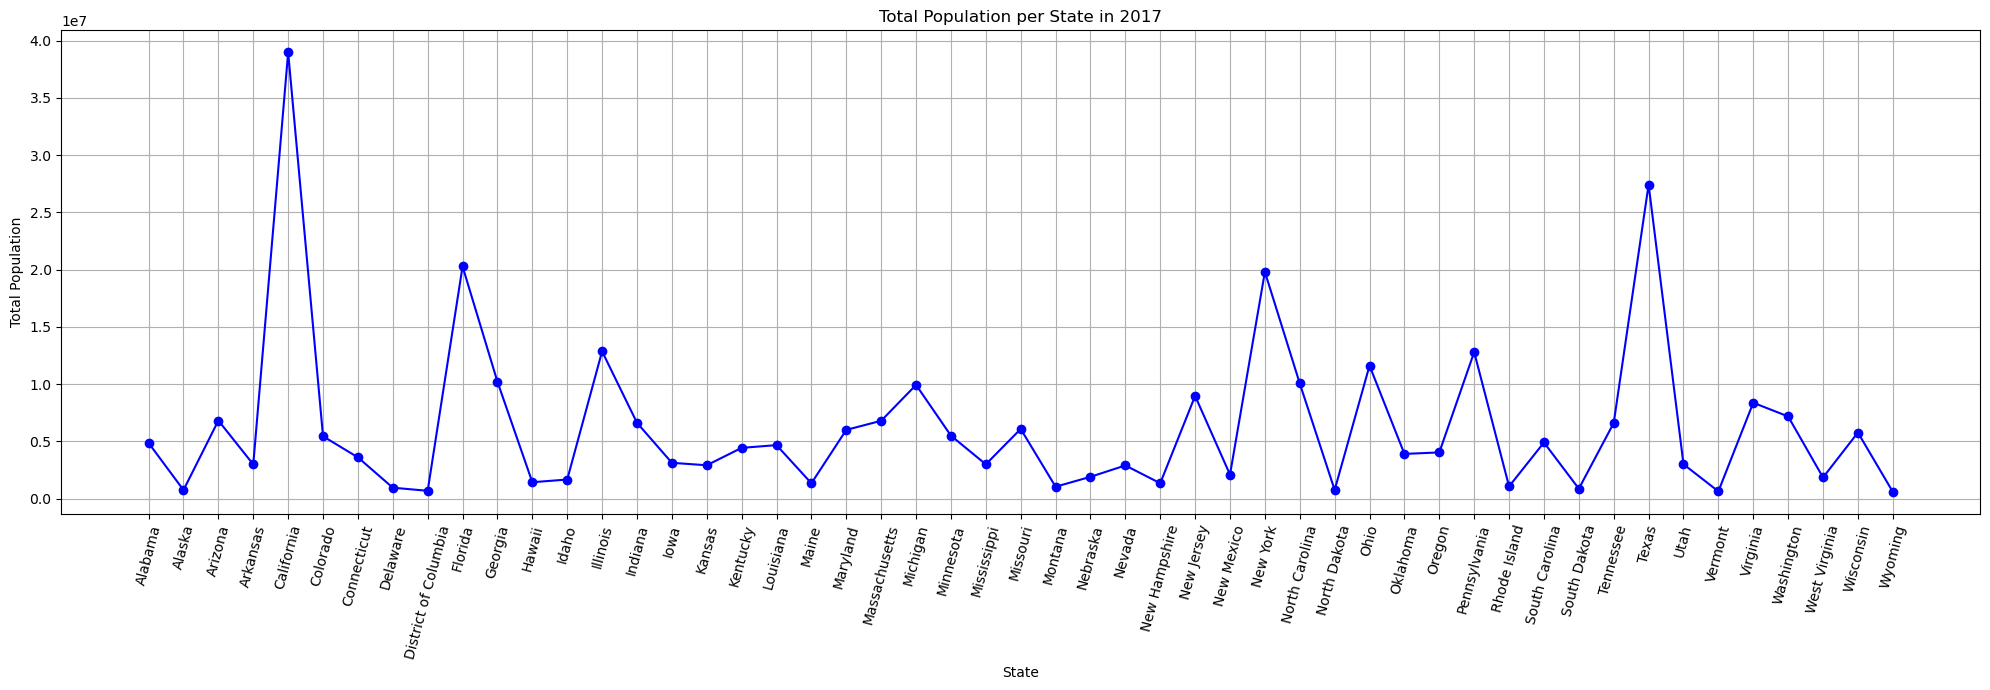

In [23]:
#Show the last year census data per state 
Year_census_data_2017 = pd.DataFrame(Year_census_data_2017)

# Create a line graph for total population per state in 2017
plt.figure(figsize=(20, 7))  # Optional: Adjust figure size

# Plotting the line graph
plt.plot(Year_census_data_2017['State'], Year_census_data_2017['Total Population'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Total Population')
plt.title('Total Population per State in 2017')

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjusts layout to make room for the x-axis labels
plt.show()

In [24]:
#calculate the top ten states per year in population

top_10_states = Year_census_data_2010.nlargest(10, 'Total Population')['State'].tolist()

# Step 2: Filter the 2017 data to include only those states
filtered_data_2010 = Year_census_data_2010[Year_census_data_2010['State'].isin(top_10_states)]
filtered_data_2011 = Year_census_data_2011[Year_census_data_2011['State'].isin(top_10_states)]
filtered_data_2012 = Year_census_data_2012[Year_census_data_2012['State'].isin(top_10_states)]
filtered_data_2013 = Year_census_data_2013[Year_census_data_2013['State'].isin(top_10_states)]
filtered_data_2014 = Year_census_data_2014[Year_census_data_2014['State'].isin(top_10_states)]
filtered_data_2015 = Year_census_data_2015[Year_census_data_2015['State'].isin(top_10_states)]
filtered_data_2016 = Year_census_data_2016[Year_census_data_2016['State'].isin(top_10_states)]
filtered_data_2017 = Year_census_data_2017[Year_census_data_2017['State'].isin(top_10_states)]

filtered_data_2015

,Year,State,Total Population,Age Categories 65 Years And Over
263,2015,California,38421464.0,4802683.0
268,2015,Florida,19645772.0,3654114.0
269,2015,Georgia,10006693.0,1190796.0
272,2015,Illinois,12873761.0,1737958.0
281,2015,Michigan,9900571.0,1485086.0
291,2015,New York,19673174.0,2813264.0
292,2015,North Carolina,9845333.0,1398037.0
294,2015,Ohio,11575977.0,1747973.0
297,2015,Pennsylvania,12779559.0,2083068.0
302,2015,Texas,26538614.0,2972325.0


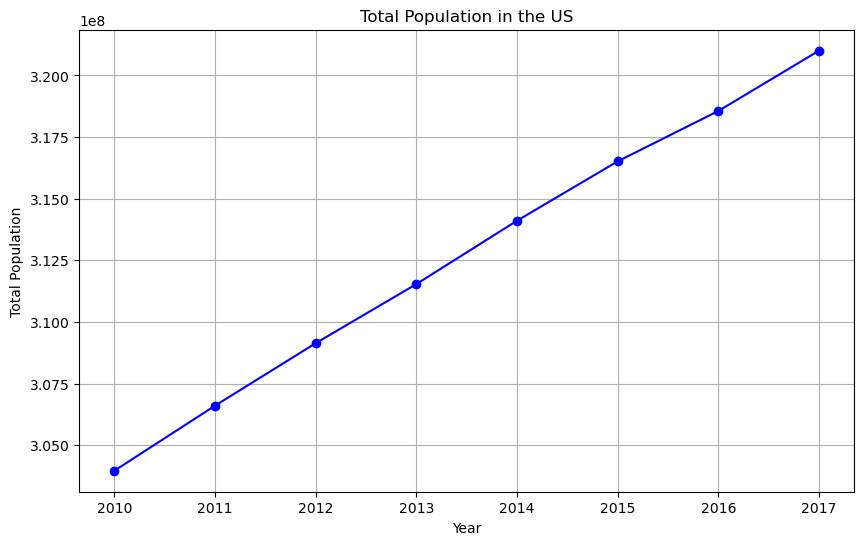

In [25]:
# Grouping data by year and summing the total population for each year
population_per_year = new_census_data.groupby("Year")["Total Population"].sum()

# Create the line plot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.plot(population_per_year.index, population_per_year.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population in the US')

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.show()

In [26]:
# print columnds 
new_census_data.columns


Index(['Year', 'State', 'Total Population',
       'Age Categories 65 Years And Over'],
      dtype='object')

In [27]:
medicare_data.columns

Index(['State', 'Medicare 2010', 'Medicare 2011', 'Medicare 2012',
       'Medicare 2013', 'Medicare 2014', 'Medicare 2015', 'Medicare 2016',
       'Medicare 2017', 'Code', 'Item'],
      dtype='object')

In [28]:
new_census_data.columns = new_census_data.columns.str.strip()
medicare_data.columns = medicare_data.columns.str.strip()

In [29]:
print('Year' in new_census_data.columns)
print('State' in new_census_data.columns)
print('Year' in medicare_data.columns)
print('State' in medicare_data.columns)

True
True
False
True


In [30]:
#merge of the two data sets
merged_data = pd.merge(new_census_data, medicare_data, on=['State'], how='inner')  # 'inner' will keep common rows
merged_data.head(5)

,Year,State,Total Population,Age Categories 65 Years And Over,Medicare 2010,Medicare 2011,Medicare 2012,Medicare 2013,Medicare 2014,Medicare 2015,Medicare 2016,Medicare 2017,Code,Item
0,2010,Alabama,4712651.0,636208.0,845,864,896,922,947,968,988,1006,11,Medicare Enrollee Population (Thousands)
1,2010,Alaska,691189.0,50457.0,66,69,73,76,80,84,88,92,11,Medicare Enrollee Population (Thousands)
2,2010,Arizona,6246816.0,830827.0,930,962,1009,1051,1096,1140,1180,1224,11,Medicare Enrollee Population (Thousands)
3,2010,Arkansas,2872684.0,405048.0,531,542,559,572,584,594,607,617,11,Medicare Enrollee Population (Thousands)
4,2010,California,36637290.0,4066739.0,4757,4901,5111,5294,5476,5645,5814,5966,11,Medicare Enrollee Population (Thousands)


In [31]:
#print the total column in the new merged data set
merged_data = merged_data.dropna()
merged_data.count()

for col in merged_data.columns:
    print(col)

Year
State
Total Population
Age Categories 65 Years And Over
Medicare 2010
Medicare 2011
Medicare 2012
Medicare 2013
Medicare 2014
Medicare 2015
Medicare 2016
Medicare 2017
Code
Item


In [32]:
#print the new merged data set
new_merged_data = merged_data[["Year", "State", "Total Population", "Age Categories 65 Years And Over", "Medicare 2010", "Medicare 2011", "Medicare 2012", "Medicare 2013", "Medicare 2014", "Medicare 2015", "Medicare 2016", "Medicare 2017", "Item"]]
new_merged_data

,Year,State,Total Population,Age Categories 65 Years And Over,Medicare 2010,Medicare 2011,Medicare 2012,Medicare 2013,Medicare 2014,Medicare 2015,Medicare 2016,Medicare 2017,Item
0,2010,Alabama,4712651.0,636208.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
1,2010,Alaska,691189.0,50457.0,66,69,73,76,80,84,88,92,Medicare Enrollee Population (Thousands)
2,2010,Arizona,6246816.0,830827.0,930,962,1009,1051,1096,1140,1180,1224,Medicare Enrollee Population (Thousands)
3,2010,Arkansas,2872684.0,405048.0,531,542,559,572,584,594,607,617,Medicare Enrollee Population (Thousands)
4,2010,California,36637290.0,4066739.0,4757,4901,5111,5294,5476,5645,5814,5966,Medicare Enrollee Population (Thousands)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2017,Virginia,8365952.0,303515.0,1141,1173,1227,1269,1311,1349,1389,1427,Medicare Enrollee Population (Thousands)
404,2017,Washington,7169967.0,253125.0,972,1005,1056,1100,1146,1192,1235,1275,Medicare Enrollee Population (Thousands)
405,2017,West Virginia,1836843.0,61792.0,382,386,397,404,411,416,422,427,Medicare Enrollee Population (Thousands)
406,2017,Wisconsin,5763217.0,205743.0,911,931,966,994,1023,1050,1080,1110,Medicare Enrollee Population (Thousands)


In [33]:
# Select the top 10 states by Total Population in the new merged data set
top_10_states = new_merged_data.nlargest(10, 'Total Population')

# Display the top 10 states
print(top_10_states[['State', 'Total Population']])

          State  Total Population
361  California        38982847.0
310  California        38654206.0
259  California        38421464.0
208  California        38066920.0
157  California        37659181.0
106  California        37325068.0
55   California        36969200.0
4    California        36637290.0
400       Texas        27419612.0
349       Texas        26956435.0


In [34]:
#organized data per state
organized_df = new_merged_data.sort_values(by=['Item', 'State','Year'])

# Display the organized DataFrame
organized_df

,Year,State,Total Population,Age Categories 65 Years And Over,Medicare 2010,Medicare 2011,Medicare 2012,Medicare 2013,Medicare 2014,Medicare 2015,Medicare 2016,Medicare 2017,Item
0,2010,Alabama,4712651.0,636208.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
51,2011,Alabama,4747424.0,645650.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
102,2012,Alabama,4777326.0,664048.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
153,2013,Alabama,4799277.0,681497.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
204,2014,Alabama,4817678.0,698563.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2013,Wyoming,570134.0,72407.0,80,82,86,89,92,95,98,102,Medicare Enrollee Population (Thousands)
254,2014,Wyoming,575251.0,75358.0,80,82,86,89,92,95,98,102,Medicare Enrollee Population (Thousands)
305,2015,Wyoming,579679.0,78257.0,80,82,86,89,92,95,98,102,Medicare Enrollee Population (Thousands)
356,2016,Wyoming,583029.0,80458.0,80,82,86,89,92,95,98,102,Medicare Enrollee Population (Thousands)


In [35]:

# Sorting the DataFrame and resetting the index
sorted_data = new_merged_data.sort_values(by=['Item', 'Year', 'State']).reset_index(drop=True)

# Display the sorted and reindexed DataFrame
sorted_data

,Year,State,Total Population,Age Categories 65 Years And Over,Medicare 2010,Medicare 2011,Medicare 2012,Medicare 2013,Medicare 2014,Medicare 2015,Medicare 2016,Medicare 2017,Item
0,2010,Alabama,4712651.0,636208.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
1,2010,Alaska,691189.0,50457.0,66,69,73,76,80,84,88,92,Medicare Enrollee Population (Thousands)
2,2010,Arizona,6246816.0,830827.0,930,962,1009,1051,1096,1140,1180,1224,Medicare Enrollee Population (Thousands)
3,2010,Arkansas,2872684.0,405048.0,531,542,559,572,584,594,607,617,Medicare Enrollee Population (Thousands)
4,2010,California,36637290.0,4066739.0,4757,4901,5111,5294,5476,5645,5814,5966,Medicare Enrollee Population (Thousands)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2017,Virginia,8365952.0,303515.0,1141,1173,1227,1269,1311,1349,1389,1427,Medicare Enrollee Population (Thousands)
404,2017,Washington,7169967.0,253125.0,972,1005,1056,1100,1146,1192,1235,1275,Medicare Enrollee Population (Thousands)
405,2017,West Virginia,1836843.0,61792.0,382,386,397,404,411,416,422,427,Medicare Enrollee Population (Thousands)
406,2017,Wisconsin,5763217.0,205743.0,911,931,966,994,1023,1050,1080,1110,Medicare Enrollee Population (Thousands)


In [36]:

# Print the description of the 'Item' column
item_description = new_merged_data['Item'].describe()

# Display the result
item_description

count                                          408
unique                                           1
top       Medicare Enrollee Population (Thousands)
freq                                           408
Name: Item, dtype: object

In [37]:
# Get the unique descriptions of the 'Item' column
unique_item_descriptions = new_merged_data['Item'].unique()

# Print the unique descriptions
print(unique_item_descriptions)

['Medicare Enrollee Population (Thousands)']


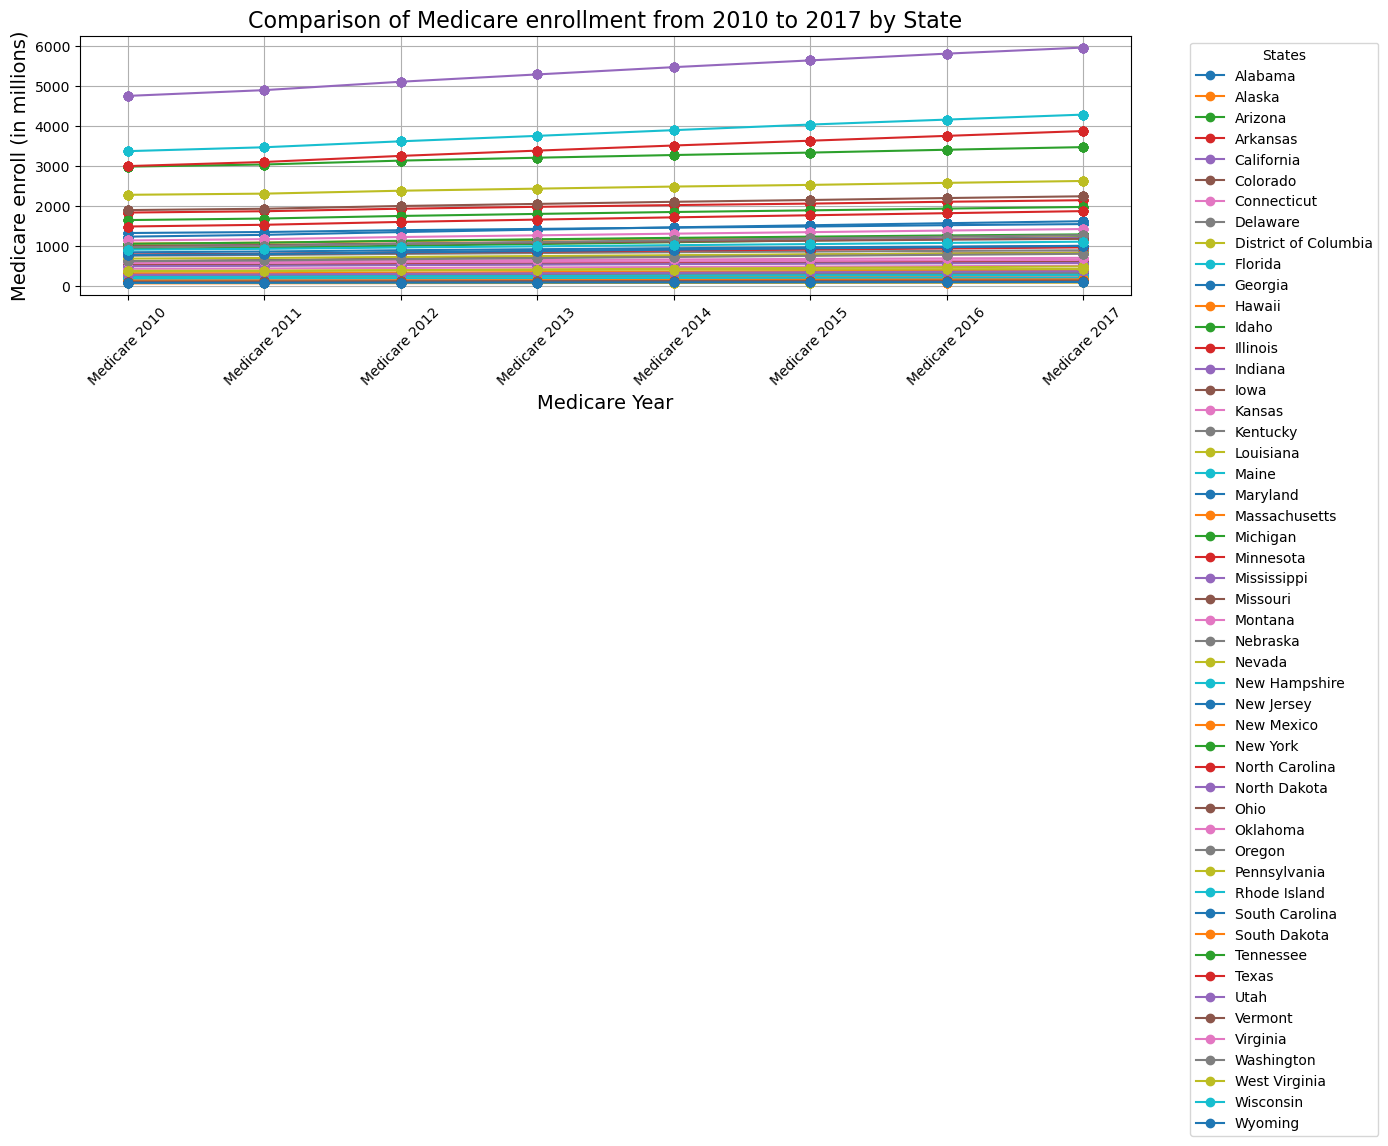

In [38]:
# Step 1: Melt the DataFrame to have Year and Medicare enroll in long format
medicare_years = ['Medicare 2010', 'Medicare 2011', 'Medicare 2012', 
                  'Medicare 2013', 'Medicare 2014', 'Medicare 2015', 
                  'Medicare 2016', 'Medicare 2017']

# Melt the DataFrame
melted_data = new_merged_data.melt(id_vars=['State', 'Year'], 
                                     value_vars=medicare_years, 
                                     var_name='Medicare Year', 
                                     value_name='Medicare Amount')

# Step 2: Filter to get Medicare data for 2010 and other years
comparison_data = melted_data[melted_data['Medicare Year'].isin(medicare_years)]

# Step 3: Plotting the data
plt.figure(figsize=(14, 8))

# Loop through each state and plot their Medicare data
for state in comparison_data['State'].unique():
    state_data = comparison_data[comparison_data['State'] == state]
    plt.plot(state_data['Medicare Year'], state_data['Medicare Amount'], 
             marker='o', label=state)

# Step 4: Customize the plot
plt.title('Comparison of Medicare enrollment from 2010 to 2017 by State', fontsize=16)
plt.xlabel('Medicare Year', fontsize=14)
plt.ylabel('Medicare enroll (in millions)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [39]:
#organize data set 
organized_data = new_merged_data.sort_values(by=['Item', 'Year', 'State'], ascending=True)

# Display the first few rows of the organized data (or use organized_data.head())
organized_data

,Year,State,Total Population,Age Categories 65 Years And Over,Medicare 2010,Medicare 2011,Medicare 2012,Medicare 2013,Medicare 2014,Medicare 2015,Medicare 2016,Medicare 2017,Item
0,2010,Alabama,4712651.0,636208.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
1,2010,Alaska,691189.0,50457.0,66,69,73,76,80,84,88,92,Medicare Enrollee Population (Thousands)
2,2010,Arizona,6246816.0,830827.0,930,962,1009,1051,1096,1140,1180,1224,Medicare Enrollee Population (Thousands)
3,2010,Arkansas,2872684.0,405048.0,531,542,559,572,584,594,607,617,Medicare Enrollee Population (Thousands)
4,2010,California,36637290.0,4066739.0,4757,4901,5111,5294,5476,5645,5814,5966,Medicare Enrollee Population (Thousands)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2017,Virginia,8365952.0,303515.0,1141,1173,1227,1269,1311,1349,1389,1427,Medicare Enrollee Population (Thousands)
404,2017,Washington,7169967.0,253125.0,972,1005,1056,1100,1146,1192,1235,1275,Medicare Enrollee Population (Thousands)
405,2017,West Virginia,1836843.0,61792.0,382,386,397,404,411,416,422,427,Medicare Enrollee Population (Thousands)
406,2017,Wisconsin,5763217.0,205743.0,911,931,966,994,1023,1050,1080,1110,Medicare Enrollee Population (Thousands)


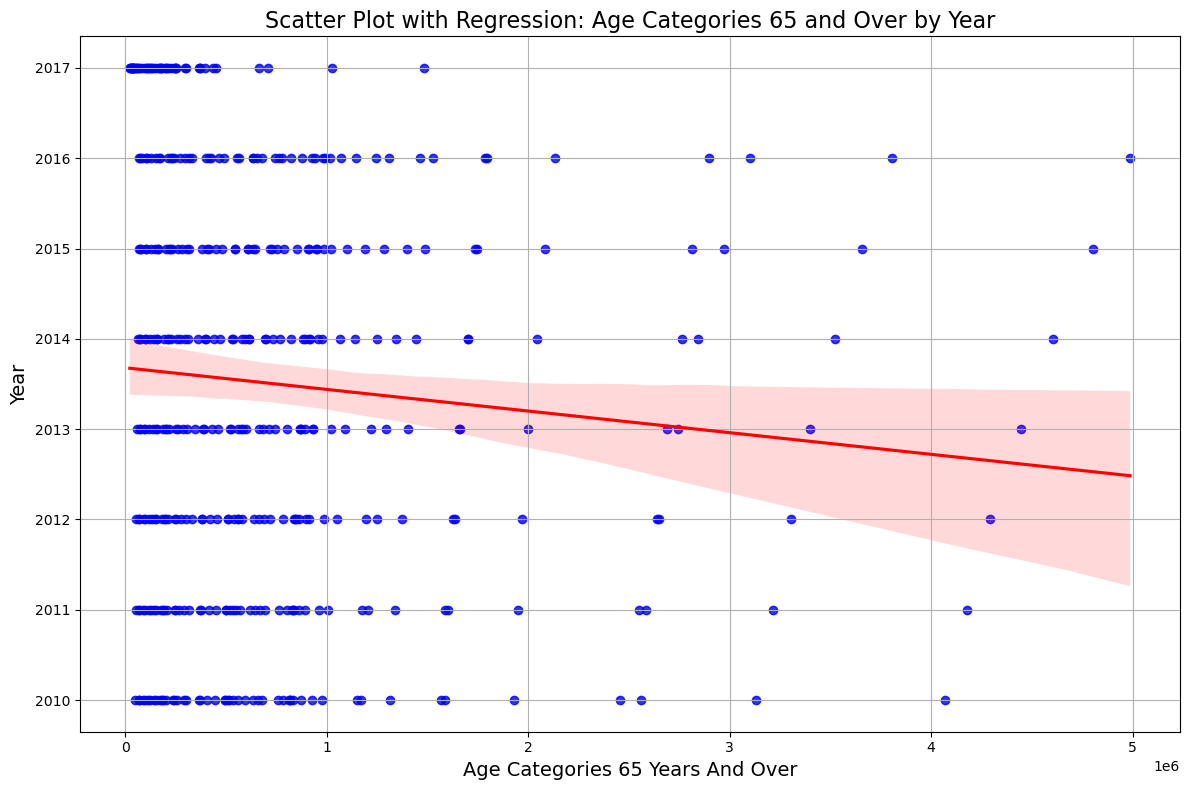

In [43]:
#create a scatter plot with line regration in population elejible to enroll medicare 
# Step 1: Set up the figure size
plt.figure(figsize=(12, 8))

# Step 2: Create scatterplot with regression line
sns.regplot(data=organized_data, 
            x='Age Categories 65 Years And Over', 
            y='Year', 
            scatter_kws={'color': 'blue'}, 
            line_kws={'color': 'red'})

# Step 3: Adding labels and title
plt.xlabel('Age Categories 65 Years And Over', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.title('Scatter Plot with Regression: Age Categories 65 and Over by Year', fontsize=16)

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.ticklabel_format(style='plain',axis='y')
plt.tight_layout()
plt.show()

In [45]:
# Step 1: Calculate the top 10 states with the highest population
top_10_states = new_census_data.nlargest(10, 'Total Population')

# Step 2: Display the result
print(top_10_states[['State', 'Total Population']])

          State  Total Population
365  California        38982847.0
314  California        38654206.0
263  California        38421464.0
212  California        38066920.0
161  California        37659181.0
110  California        37325068.0
55   California        36969200.0
4    California        36637290.0
404       Texas        27419612.0
353       Texas        26956435.0


In [47]:
year_2010_data = Year_census_data_2010[Year_census_data_2010['Year'] == 2010]

# Step 2: Calculate the top 10 states with the highest population for 2010
top_10_states_2010 = year_2010_data.nlargest(20, 'Total Population')

# Step 3: Display the result
print(top_10_states_2010[['State', 'Total Population']])

             State  Total Population
4       California        36637290.0
43           Texas        24311891.0
32        New York        19229752.0
9          Florida        18511620.0
13        Illinois        12745359.0
38    Pennsylvania        12612705.0
35            Ohio        11512431.0
22        Michigan         9952687.0
10         Georgia         9468815.0
33  North Carolina         9271178.0
30      New Jersey         8721577.0
46        Virginia         7841754.0
47      Washington         6561297.0
21   Massachusetts         6477096.0
14         Indiana         6417398.0
2          Arizona         6246816.0
42       Tennessee         6234968.0
25        Missouri         5922314.0
20        Maryland         5696423.0
49       Wisconsin         5637947.0


             State  Total Population
4       California        36637290.0
43           Texas        24311891.0
32        New York        19229752.0
9          Florida        18511620.0
13        Illinois        12745359.0
38    Pennsylvania        12612705.0
35            Ohio        11512431.0
22        Michigan         9952687.0
10         Georgia         9468815.0
33  North Carolina         9271178.0


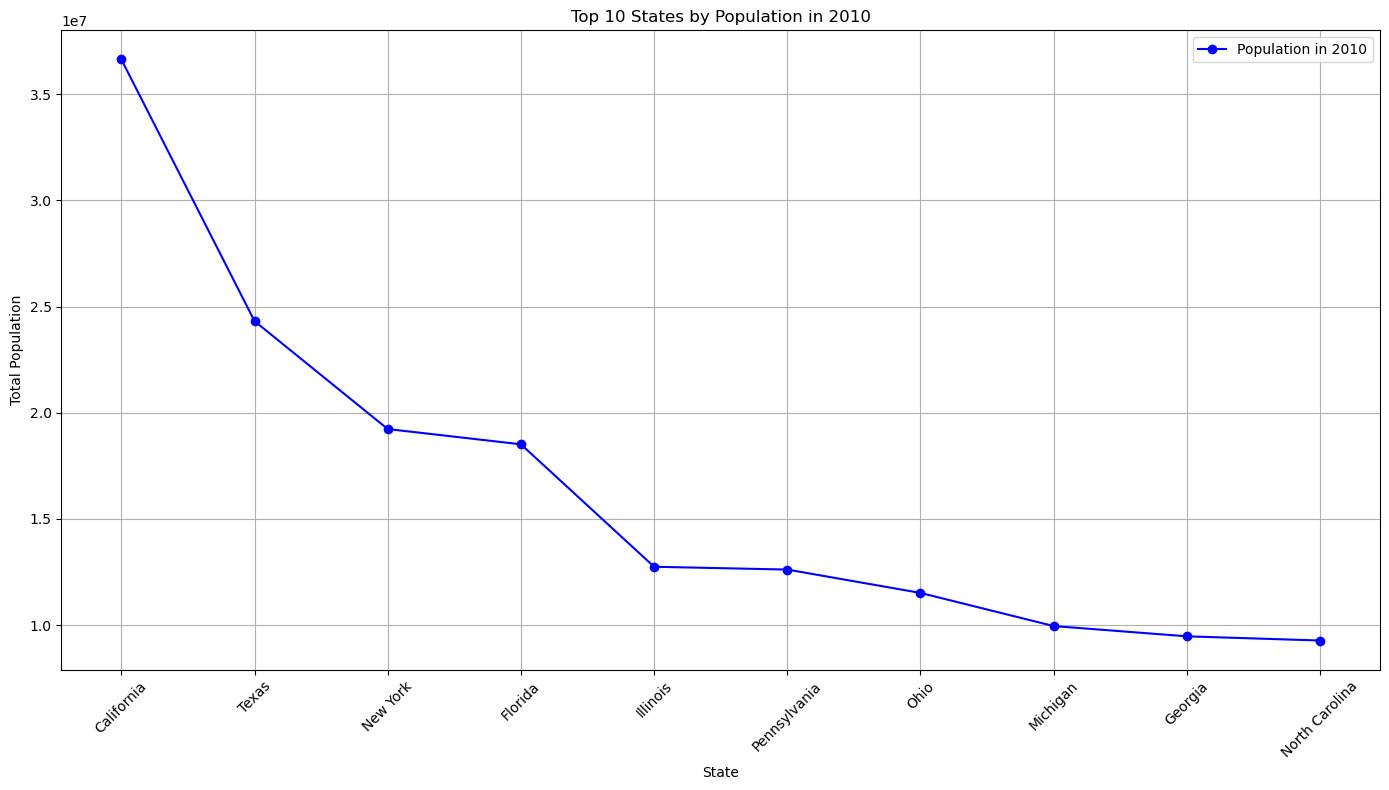

In [49]:
# show top ten states in total population per 1 year 
year_2010_data = Year_census_data_2010[Year_census_data_2010['Year'] == 2010]

# Step 2: Calculate the top 10 states with the highest population for 2010
top_10_states_2010 = year_2010_data.nlargest(10, 'Total Population')

# Step 3: Display the result (optional)
print(top_10_states_2010[['State', 'Total Population']])

# Step 4: Set up the plot
plt.figure(figsize=(14, 8))

# Step 5: Create a line plot for the top 10 states
plt.plot(top_10_states_2010['State'], top_10_states_2010['Total Population'], marker='o', linestyle='-', color='blue', label='Population in 2010')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Total Population')
plt.title('Top 10 States by Population in 2010')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding a legend
plt.legend()

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [51]:
# Filter the data for the year 2010
year_2010_data = Year_census_data_2010[Year_census_data_2010['Year'] == 2010]

# Find the top 10 states with the lowest total population in 2010
top_10_lowest_population_states = year_2010_data.nsmallest(10, 'Total Population')

# Print the result
print("Top 10 States with the Lowest Population in 2010:")
print(top_10_lowest_population_states[['State', 'Total Population']])


Top 10 States with the Lowest Population in 2010:
                   State  Total Population
50               Wyoming          545579.0
8   District of Columbia          584400.0
45               Vermont          624258.0
34          North Dakota          659858.0
1                 Alaska          691189.0
41          South Dakota          799462.0
7               Delaware          881278.0
26               Montana          973739.0
39          Rhode Island         1056389.0
29         New Hampshire         1313939.0


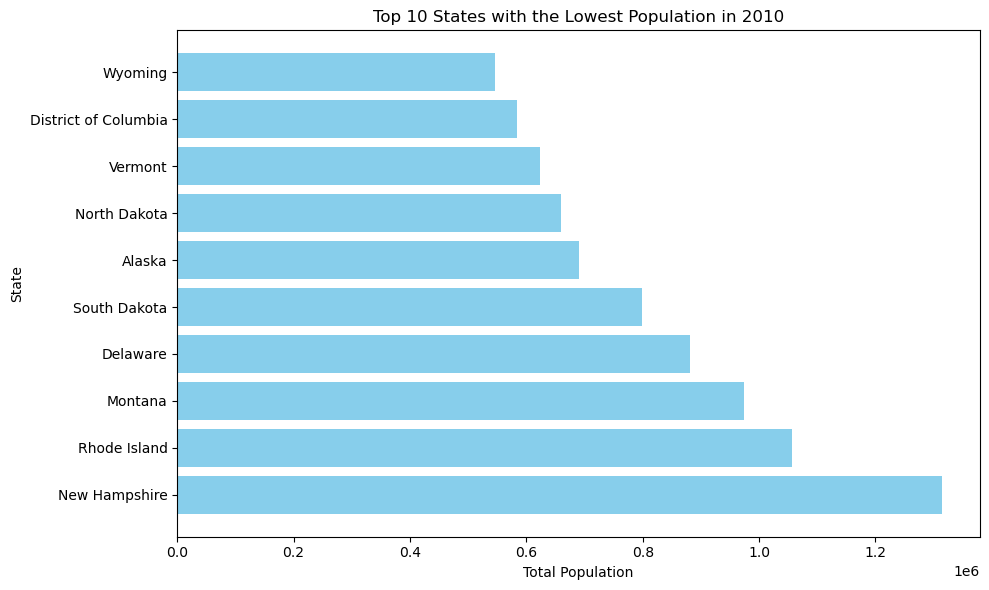

In [53]:
# Filter the data for the year 2010
year_2010_data = Year_census_data_2010[Year_census_data_2010['Year'] == 2010]

# Find the top 10 states with the lowest total population in 2010
top_10_lowest_population_states = year_2010_data.nsmallest(10, 'Total Population')

# Plot a bar chart of the top 10 states with the lowest population
plt.figure(figsize=(10, 6))
plt.barh(top_10_lowest_population_states['State'], top_10_lowest_population_states['Total Population'], color='skyblue')

# Adding labels and title
plt.xlabel('Total Population')
plt.ylabel('State')
plt.title('Top 10 States with the Lowest Population in 2010')

# Invert the y-axis to have the lowest population on top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()

In [55]:
# Group by the 'Year' column and count the total rows for each year
yearly_row_count = organized_data.groupby('Year').size()

# Print the result
print(yearly_row_count)

Year
2010    51
2011    51
2012    51
2013    51
2014    51
2015    51
2016    51
2017    51
dtype: int64


In [57]:
year_2010_data = new_merged_data[new_merged_data['Year'] == 2010]

# Step 2: Calculate the top 10 states with the highest Medicare spending for 2010
top_10_states_medicare_2010 = year_2010_data.nlargest(10, 'Medicare 2010')
top_10_states_overall = new_merged_data.groupby('State')['Medicare 2010'].sum().nlargest(10)

# Step 3: Display the result
print(top_10_states_medicare_2010[['State', 'Medicare 2010']])

             State  Medicare 2010
4       California           4757
9          Florida           3375
43           Texas           3001
32        New York           2988
38    Pennsylvania           2283
35            Ohio           1901
13        Illinois           1839
22        Michigan           1651
33  North Carolina           1490
30      New Jersey           1327


             State  Medicare 2010
4       California           4757
9          Florida           3375
43           Texas           3001
32        New York           2988
38    Pennsylvania           2283
35            Ohio           1901
13        Illinois           1839
22        Michigan           1651
33  North Carolina           1490
30      New Jersey           1327


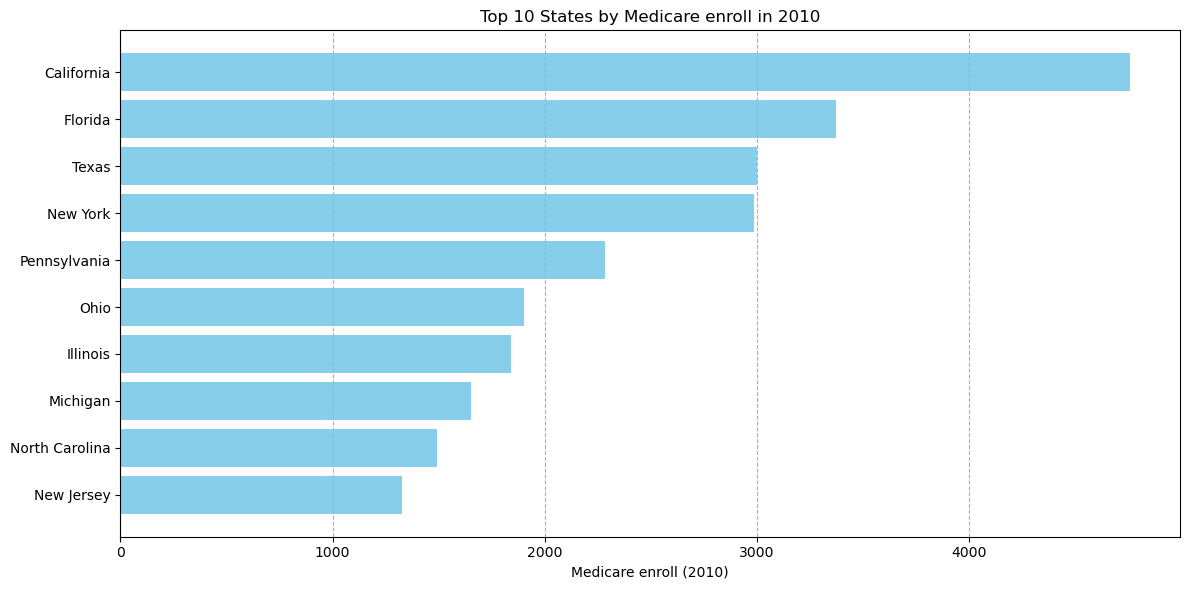

In [59]:
# Assuming `new_merged_data` is your DataFrame and contains the relevant columns
year_2010_data = new_merged_data[new_merged_data['Year'] == 2010]

# Step 2: Calculate the top 10 states with the highest Medicare spending for 2010
top_10_states_medicare_2010 = year_2010_data.nlargest(10, 'Medicare 2010')

# Step 3: Display the result (optional)
print(top_10_states_medicare_2010[['State', 'Medicare 2010']])

# Step 4: Create a bar chart for the top 10 states
plt.figure(figsize=(12, 6))
plt.barh(top_10_states_medicare_2010['State'], top_10_states_medicare_2010['Medicare 2010'], color='skyblue')
plt.xlabel('Medicare enroll (2010)')
plt.title('Top 10 States by Medicare enroll in 2010')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest spending at the top
plt.grid(axis='x', linestyle='--')

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

                   State  Medicare 2010
1                 Alaska             66
8   District of Columbia             78
50               Wyoming             80
34          North Dakota            109
45               Vermont            112
41          South Dakota            137
7               Delaware            149
26               Montana            170
39          Rhode Island            183
11                Hawaii            206


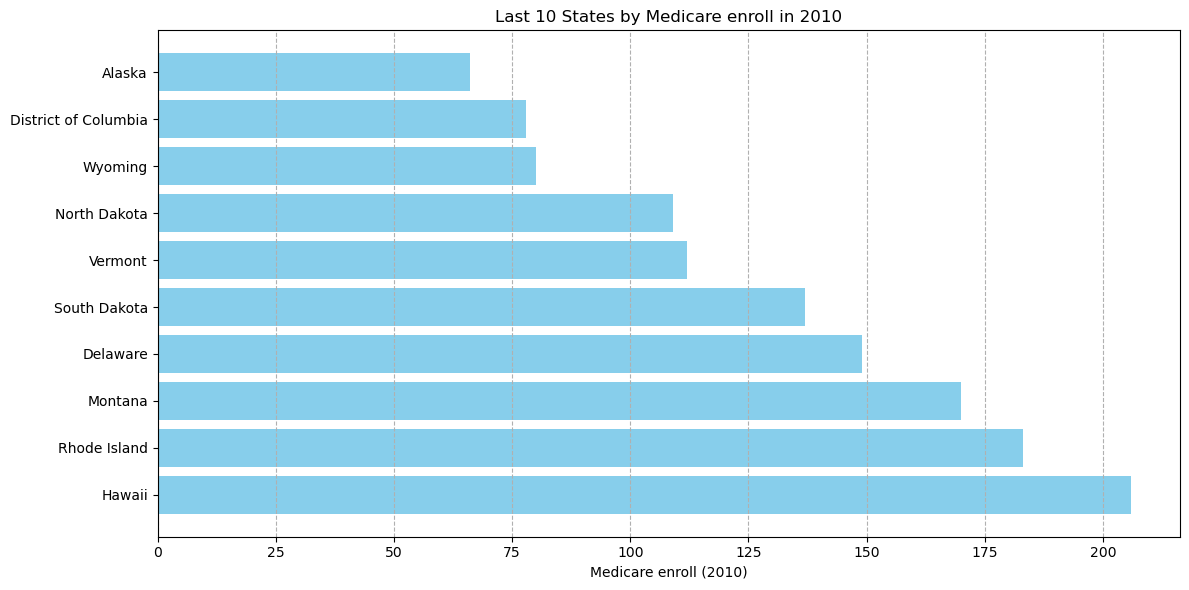

In [61]:
# Assuming `new_merged_data` is your DataFrame and contains the relevant columns
year_2010_data = new_merged_data[new_merged_data['Year'] == 2010]

# Step 2: Calculate the top 10 states with the highest Medicare spending for 2010
top_10_states_medicare_2010 = year_2010_data.nsmallest(10, 'Medicare 2010')

# Step 3: Display the result (optional)
print(top_10_states_medicare_2010[['State', 'Medicare 2010']])

# Step 4: Create a bar chart for the top 10 states
plt.figure(figsize=(12, 6))
plt.barh(top_10_states_medicare_2010['State'], top_10_states_medicare_2010['Medicare 2010'], color='skyblue')
plt.xlabel('Medicare enroll (2010)')
plt.title('Last 10 States by Medicare enroll in 2010')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest spending at the top
plt.grid(axis='x', linestyle='--')

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

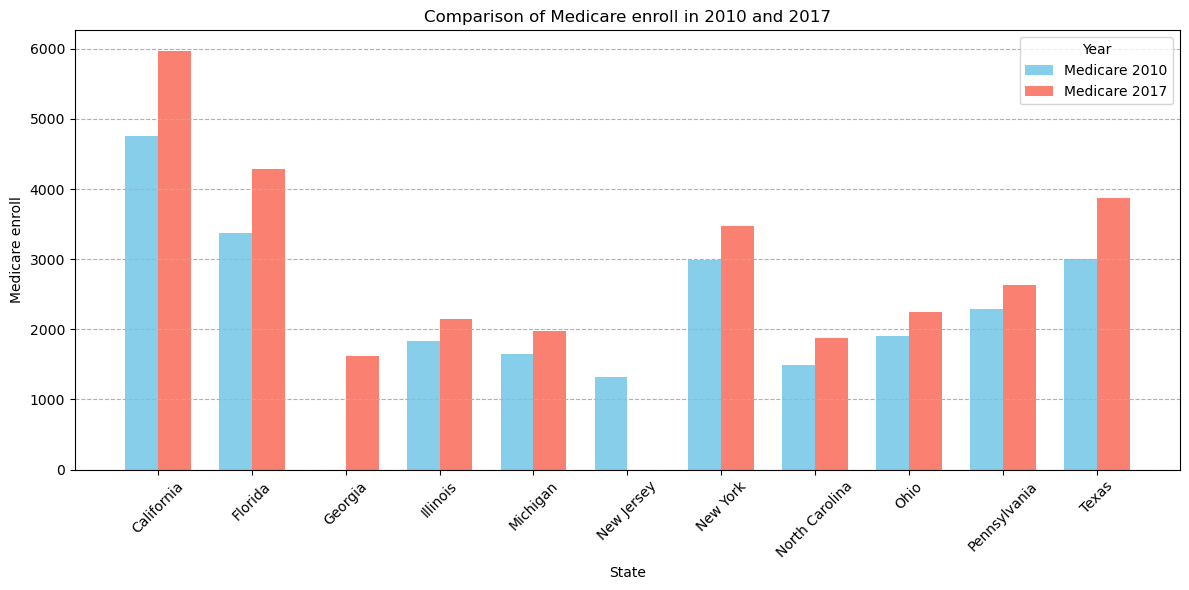

In [63]:
# Step 1: Filter data for 2010 and 2017
year_2010_data = new_merged_data[new_merged_data['Year'] == 2010]
year_2017_data = new_merged_data[new_merged_data['Year'] == 2017]

# Step 2: Calculate the top 10 states with the highest Medicare spending for 2010 and 2017
top_10_states_medicare_2010 = year_2010_data.nlargest(10, 'Medicare 2010')[['State', 'Medicare 2010']]
top_10_states_medicare_2017 = year_2017_data.nlargest(10, 'Medicare 2017')[['State', 'Medicare 2017']]

# Step 3: Merge the two DataFrames on 'State' to get both years' spending
comparison_data = pd.merge(top_10_states_medicare_2010, top_10_states_medicare_2017, on='State', how='outer')

# Step 4: Create a grouped bar chart for the top 10 states
bar_width = 0.35
index = range(len(comparison_data))

plt.figure(figsize=(12, 6))
plt.bar(index, comparison_data['Medicare 2010'], width=bar_width, label='Medicare 2010', color='skyblue')
plt.bar([i + bar_width for i in index], comparison_data['Medicare 2017'], width=bar_width, label='Medicare 2017', color='salmon')

# Step 5: Customize the chart
plt.xlabel('State')
plt.ylabel('Medicare enroll')
plt.title('Comparison of Medicare enroll in 2010 and 2017')
plt.xticks([i + bar_width / 2 for i in index], comparison_data['State'], rotation=45)  # Center the x-tick labels
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

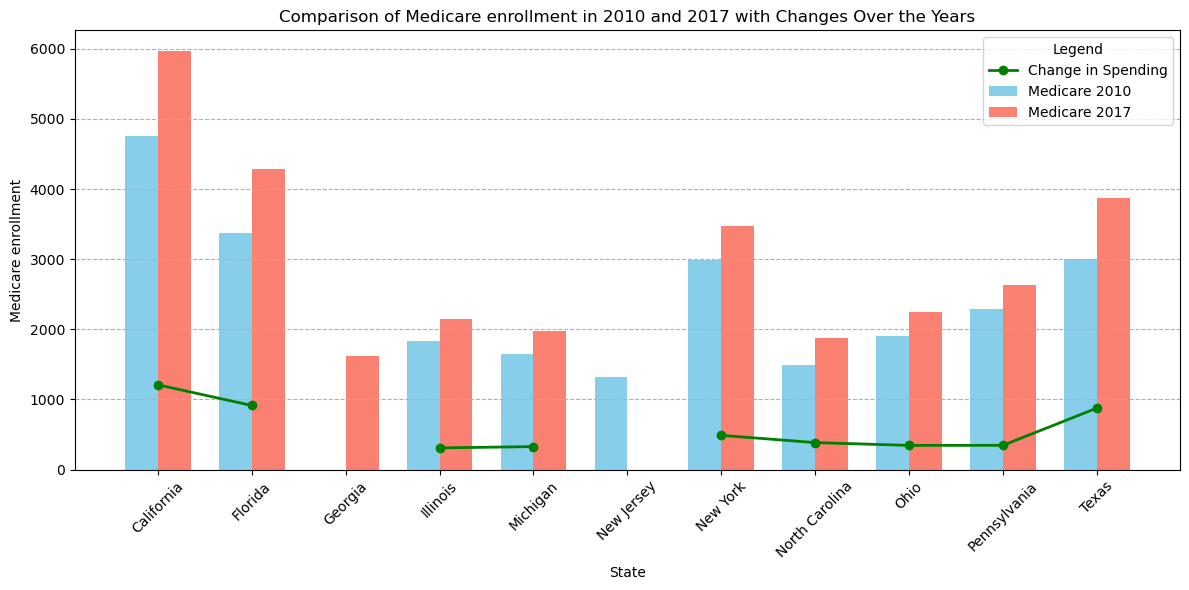

In [65]:
# Step 1: Filter data for 2010 and 2017
year_2010_data = new_merged_data[new_merged_data['Year'] == 2010]
year_2017_data = new_merged_data[new_merged_data['Year'] == 2017]

# Step 2: Calculate the top 10 states with the highest Medicare spending for 2010 and 2017
top_10_states_medicare_2010 = year_2010_data.nlargest(10, 'Medicare 2010')[['State', 'Medicare 2010']]
top_10_states_medicare_2017 = year_2017_data.nlargest(10, 'Medicare 2017')[['State', 'Medicare 2017']]

# Step 3: Merge the two DataFrames on 'State' to get both years' spending
comparison_data = pd.merge(top_10_states_medicare_2010, top_10_states_medicare_2017, on='State', how='outer')

# Step 4: Create a grouped bar chart for the top 10 states
bar_width = 0.35
index = range(len(comparison_data))

plt.figure(figsize=(12, 6))
# Bar for Medicare 2010
plt.bar(index, comparison_data['Medicare 2010'], width=bar_width, label='Medicare 2010', color='skyblue')
# Bar for Medicare 2017
plt.bar([i + bar_width for i in index], comparison_data['Medicare 2017'], width=bar_width, label='Medicare 2017', color='salmon')

# Step 5: Calculate the changes over the years for the line plot
# Calculate the change in spending
comparison_data['Change'] = comparison_data['Medicare 2017'] - comparison_data['Medicare 2010']

# Add a line representing the change in spending
# To plot the line, we'll calculate the x positions for the points
# The line will be plotted at the average of the two bars' positions for each state
line_x_positions = [i + bar_width / 2 for i in index]
plt.plot(line_x_positions, comparison_data['Change'], marker='o', color='green', label='Change in Spending', linewidth=2)

# Step 6: Customize the chart
plt.xlabel('State')
plt.ylabel('Medicare enrollment')
plt.title('Comparison of Medicare enrollment in 2010 and 2017 with Changes Over the Years')
plt.xticks([i + bar_width / 2 for i in index], comparison_data['State'], rotation=45)  # Center the x-tick labels
plt.legend(title='Legend')
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [67]:
medicare_years = ['Medicare 2010', 'Medicare 2011', 'Medicare 2012', 
                  'Medicare 2013', 'Medicare 2014', 'Medicare 2015', 
                  'Medicare 2016', 'Medicare 2017']

medicare_melted = year_2010_data.melt(id_vars=['State', 'Year'], 
                                       value_vars=medicare_years, 
                                       var_name='Medicare Year', 
                                       value_name='Medicare Amount')

# Step 1: Calculate top 10 states based on total Medicare spending across all years
top_10_states_overall = medicare_melted.groupby('State')['Medicare Amount'].sum().nlargest(10)

# Step 2: Display the results
print("Top 10 States by Total Medicare Spending:")
print(top_10_states_overall)

Top 10 States by Total Medicare Spending:
State
California        42964
Florida           30618
Texas             27536
New York          25881
Pennsylvania      19648
Ohio              16602
Illinois          15974
Michigan          14563
North Carolina    13478
New Jersey        11532
Name: Medicare Amount, dtype: int64


In [69]:
top_10_states_medicare_2010 = year_2010_data.nlargest(10, 'Medicare 2010')

# Step 2: Filter the original DataFrame for the top 10 states
# Assuming `year_2010_data` is the original DataFrame containing all years' data
top_10_states_all_years = year_2010_data[year_2010_data['State'].isin(top_10_states_medicare_2010['State'])]

# Step 3: Select relevant columns including Medicare spending for 2011 to 2017
top_10_states_all_years = top_10_states_all_years[["State", "Medicare 2010", "Medicare 2011", 
                                                     "Medicare 2012", "Medicare 2013", 
                                                     "Medicare 2014", "Medicare 2015", 
                                                     "Medicare 2016", "Medicare 2017"]]
top_10_states_all_years.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(f"The Top 10 states with expenditure on medicare: ")
top_10_states_all_years.head(20)

The Top 10 states with expenditure on medicare: 


,State,Medicare 2010,Medicare 2011,Medicare 2012,Medicare 2013,Medicare 2014,Medicare 2015,Medicare 2016,Medicare 2017
0,California,4757,4901,5111,5294,5476,5645,5814,5966
1,Florida,3375,3472,3621,3757,3900,4040,4164,4289
2,Illinois,1839,1872,1935,1982,2026,2063,2109,2148
3,Michigan,1651,1689,1754,1805,1853,1894,1938,1979
4,New Jersey,1327,1352,1398,1430,1462,1489,1523,1551
5,New York,2988,3041,3138,3211,3278,3339,3410,3476
6,North Carolina,1490,1533,1604,1663,1719,1771,1823,1875
7,Ohio,1901,1934,2003,2055,2108,2153,2202,2246
8,Pennsylvania,2283,2312,2385,2437,2489,2531,2582,2629
9,Texas,3001,3104,3256,3388,3516,3636,3757,3878


In [71]:
year_to_filter = 2010

# Filter the data for the specified year
filtered_data_by_year = organized_data[organized_data['Year'] == year_to_filter]

# Print the unique item descriptions for that year
unique_items = filtered_data_by_year['Item'].unique()

# Print the unique item descriptions
print(f"Unique item descriptions for the year {year_to_filter}:")
for item in unique_items:
    print(item)

Unique item descriptions for the year 2010:
Medicare Enrollee Population (Thousands)


In [73]:
#Total Population Enrollment in Medicare between 2010 and 2017

In [75]:
# Specify the year you want to print
specific_year = 2010  # Change this to the desired year

# Filter the DataFrame for the specified year
year_data = organized_data[organized_data['Year'] == specific_year]

# Print the Year
print(f"Year: {specific_year}")

# Print each State and Item for the specified year
for index, row in year_data.iterrows():
    print(f"  State: {row['State']}, Item: {row['Item']}")

Year: 2010
  State: Alabama, Item: Medicare Enrollee Population (Thousands)
  State: Alaska, Item: Medicare Enrollee Population (Thousands)
  State: Arizona, Item: Medicare Enrollee Population (Thousands)
  State: Arkansas, Item: Medicare Enrollee Population (Thousands)
  State: California, Item: Medicare Enrollee Population (Thousands)
  State: Colorado, Item: Medicare Enrollee Population (Thousands)
  State: Connecticut, Item: Medicare Enrollee Population (Thousands)
  State: Delaware, Item: Medicare Enrollee Population (Thousands)
  State: District of Columbia, Item: Medicare Enrollee Population (Thousands)
  State: Florida, Item: Medicare Enrollee Population (Thousands)
  State: Georgia, Item: Medicare Enrollee Population (Thousands)
  State: Hawaii, Item: Medicare Enrollee Population (Thousands)
  State: Idaho, Item: Medicare Enrollee Population (Thousands)
  State: Illinois, Item: Medicare Enrollee Population (Thousands)
  State: Indiana, Item: Medicare Enrollee Population (Thous

In [77]:
#Medicare spending per state; comparison between two year 2010 and 2017

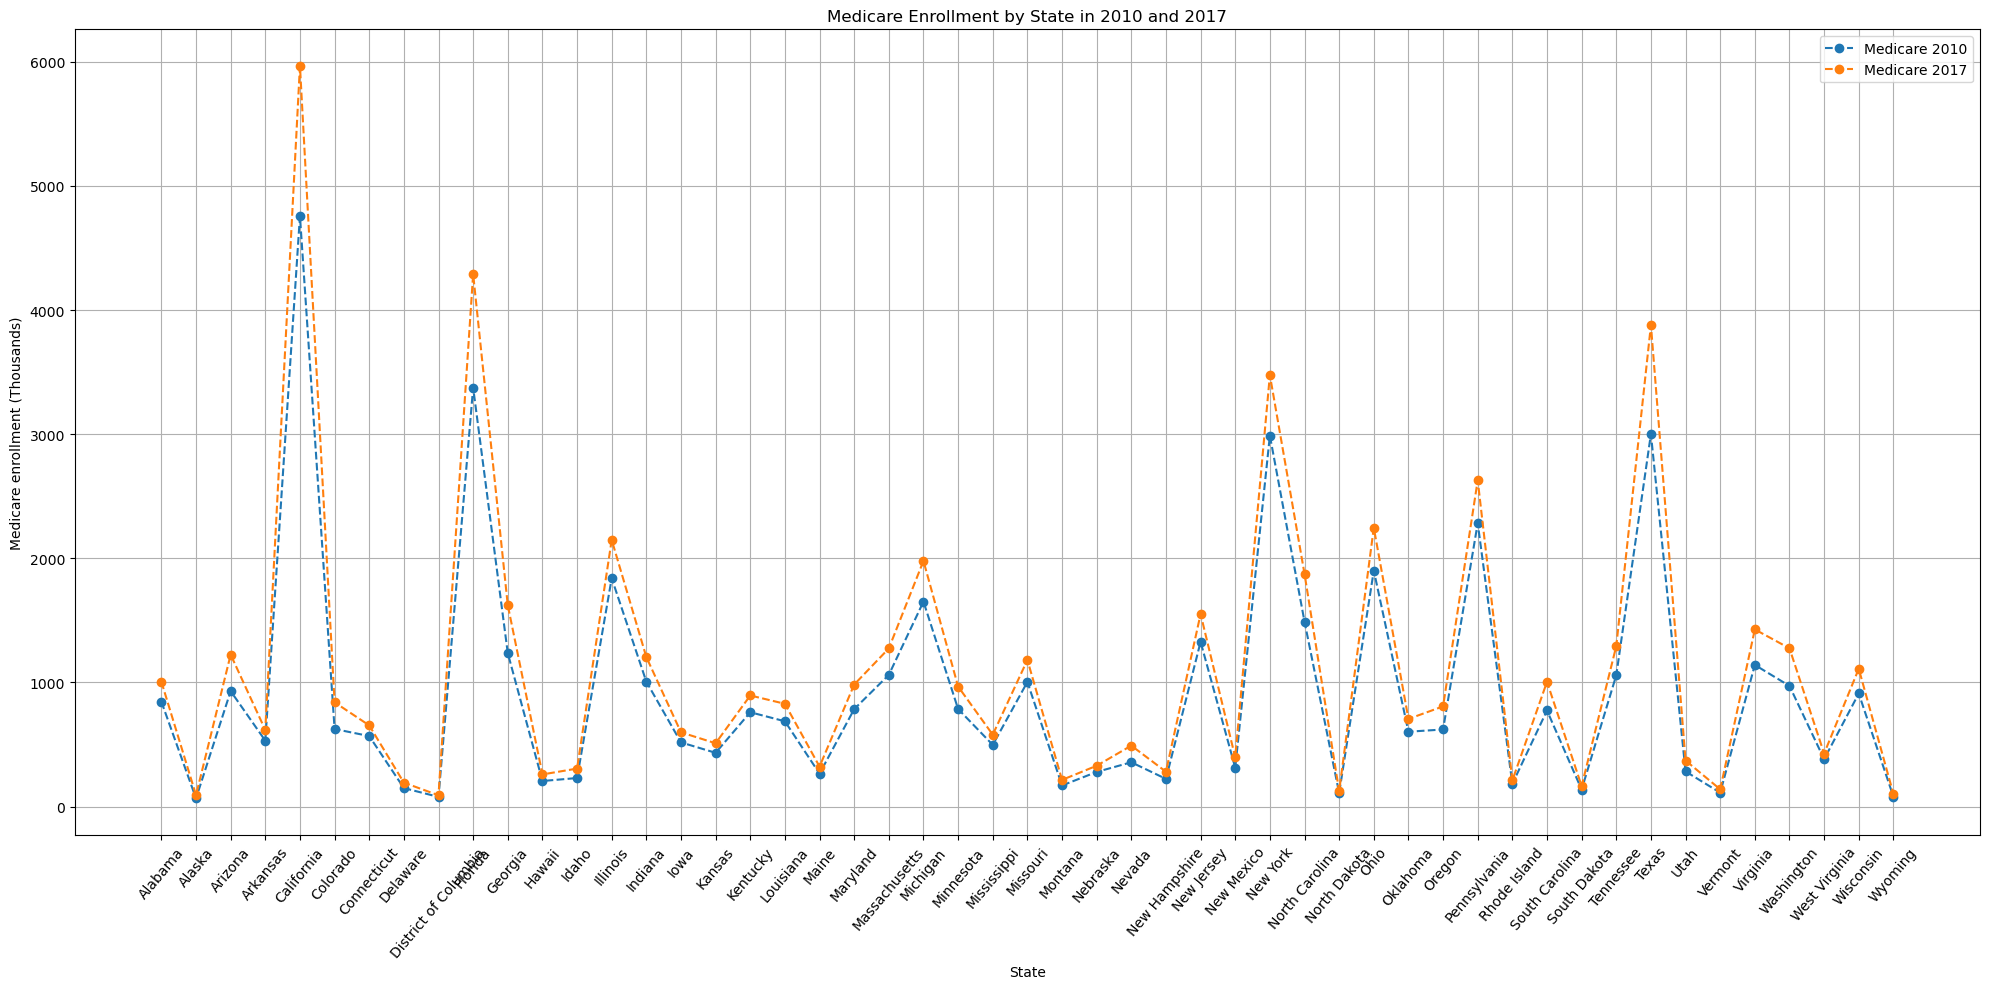

In [79]:
# Specify the year you want to plot
specific_year = 2010  # Change this to your desired year

# Filter the merged data for the specific year
year_data = new_merged_data[new_merged_data['Year'] == specific_year]

# Set up the plot
plt.figure(figsize=(20, 10))

# Plotting Medicare spending per state for the specified year
plt.plot(year_data['State'], year_data['Medicare 2010'], marker='o', linestyle='--', label='Medicare 2010')

plt.plot(year_data['State'], year_data['Medicare 2017'], marker='o', linestyle='--', label='Medicare 2017')

# Add more lines for additional Medicare years if needed

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Medicare enrollment (Thousands)')
plt.title(f'Medicare Enrollment by State in 2010 and 2017')

# Rotate x-axis labels for better readability
plt.xticks(rotation=50)

# Adding a legend
plt.legend()

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Top ten states in Medicare expenditure in 2010 and 2017

In [ ]:
specific_year = 2010

# Step 1: Filter the data for the specific year
year_data = new_merged_data[new_merged_data['Year'] == specific_year]

# Step 2: Get the top 10 states by a specific metric (e.g., 'Medicare 2010')
top_10_states = year_data.nlargest(10, 'Medicare 2010')

# Step 3: Plotting the data
plt.figure(figsize=(12, 6))

# Create a line plot for each state
for index, row in top_10_states.iterrows():
    plt.plot(row['State'], row['Medicare 2010'], marker='o', label=row['State'])

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Medicare enrollment in 2010')
plt.title(f'Top 10 States by Medicare enrollment in {specific_year}')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.ticklabel_format(style='plain',axis='y')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [ ]:
specific_year = 2017

# Step 1: Filter the data for the specific year
year_data = new_merged_data[new_merged_data['Year'] == specific_year]

# Step 2: Get the top 10 states by a specific metric (e.g., 'Medicare 2010')
top_10_states = year_data.nlargest(10, 'Medicare 2017')

# Step 3: Plotting the data
plt.figure(figsize=(12, 6))

# Create a line plot for each state
for index, row in top_10_states.iterrows():
    plt.plot(row['State'], row['Medicare 2017'], marker='o', label=row['State'])

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Medicare spent in 2017')
plt.title(f'Top 10 States by Medicare spent in {specific_year}')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [ ]:
# Step 1: Filter the data for 2010 and 2017
filtered_data = new_merged_data[new_merged_data['Year'].isin([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])]

# Step 2: Create the scatter plot with regression lines
plt.figure(figsize=(14, 7))

# Scatter plot and line regression for Medicare 2010
sns.regplot(data=filtered_data[filtered_data['Year'] == 2010], 
            x='Age Categories 65 Years And Over', 
            y='Medicare 2010', 
            label='Medicare 2010', 
            marker='o', 
            color='blue')
# Scatter plot and line regression for Medicare 2011
sns.regplot(data=filtered_data[filtered_data['Year'] == 2011], 
            x='Age Categories 65 Years And Over', 
            y='Medicare 2011', 
            label='Medicare 2011', 
            marker='o', 
            color='red')
# Scatter plot and line regression for Medicare 2012
sns.regplot(data=filtered_data[filtered_data['Year'] == 2012], 
            x='Age Categories 65 Years And Over', 
            y='Medicare 2012', 
            label='Medicare 2012', 
            marker='o', 
            color='black')
# Scatter plot and line regression for Medicare 2013
sns.regplot(data=filtered_data[filtered_data['Year'] == 2013], 
            x='Age Categories 65 Years And Over', 
            y='Medicare 2013', 
            label='Medicare 2013', 
            marker='o', 
            color='yellow')
# Scatter plot and line regression for Medicare 2014
sns.regplot(data=filtered_data[filtered_data['Year'] == 2014], 
            x='Age Categories 65 Years And Over', 
            y='Medicare 2014', 
            label='Medicare 2014', 
            marker='o', 
            color='green')
# Scatter plot and line regression for Medicare 2015
sns.regplot(data=filtered_data[filtered_data['Year'] == 2015], 
            x='Age Categories 65 Years And Over', 
            y='Medicare 2015', 
            label='Medicare 2015', 
            marker='o', 
            color='pink')
# Scatter plot and line regression for Medicare 2016
sns.regplot(data=filtered_data[filtered_data['Year'] == 2016], 
            x='Age Categories 65 Years And Over', 
            y='Medicare 2016', 
            label='Medicare 2016', 
            marker='o', 
            color='Olive')

# Adding labels and title
plt.xlabel('Age Categories 65 Years And Over', fontsize=14)
plt.ylabel('Medicare Spending', fontsize=14)
plt.title('Line Regression of Medicare enrollment for Ages 65 and Over (2010 vs 2016)', fontsize=16)

# Adding legend
plt.legend()

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Years to compare
years_to_compare = [2010, 2014, 2016]

# Step 1: Create a figure
plt.figure(figsize=(12, 6))

# Loop through each year to plot
for specific_year in years_to_compare:
    # Step 2: Filter the data for the specific year
    year_data = new_merged_data[new_merged_data['Year'] == specific_year]

    # Step 3: Get the top 10 states by a specific metric (e.g., 'Medicare 2010' or 'Medicare 2017')
    top_10_states = year_data.nlargest(10, f'Medicare {specific_year}')

    # Create a line plot for each state
    for index, row in top_10_states.iterrows():
        plt.plot(row['State'], row[f'Medicare {specific_year}'], marker='o', label=f'{row["State"]} ({specific_year})')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Medicare enroll')
plt.title(f'Top 10 States by Medicare enroll in 2010, 2014 and 2016')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [ ]:
plt.figure(figsize=(16, 8))

# Define the years to plot
years = range(2010, 2018)  # 2010 to 2017

# Loop through each year and create a line plot
for year in years:
    # Filter the data for the specific year
    year_data = new_merged_data[['State', f'Medicare {year}']]
    
    # Create a line plot for each year
    plt.plot(year_data['State'], year_data[f'Medicare {year}'], marker='o', label=f'Medicare {year}')

# Adding labels and title
plt.xlabel('State', fontsize=14)
plt.ylabel('Medicare Spending', fontsize=14)
plt.title('Medicare Spending by State from 2010 to 2017', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='Years', bbox_to_anchor=(1.05, 1), loc='upper left')

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [ ]:
#Comparison total population in 2010 and 2017

In [ ]:
# Step 1: Filter the data for 2010 and 2017
data_2010 = new_merged_data[new_merged_data['Year'] == 2010]
data_2017 = new_merged_data[new_merged_data['Year'] == 2017]

# Step 2: Combine the data
# We will keep only the relevant columns for comparison
comparison_data = pd.concat([data_2010[['State', 'Total Population', 'Medicare 2010']],
                              data_2017[['State', 'Total Population', 'Medicare 2017']]], 
                             keys=['2010', '2017']).reset_index(level=0).rename(columns={'level_0': 'Year'})

# Optional: Resetting index for better visualization
comparison_data.reset_index(drop=True, inplace=True)

In [ ]:
states = comparison_data['State'].unique()
indices = np.arange(len(states))  # create a range for states

# Step 3: Plotting
fig, ax = plt.subplots(figsize=(16, 6))

# Plotting Total Population for 2010
width = 0.5  # Bar width
population_2010 = comparison_data[comparison_data['Year'] == '2010']['Total Population']
population_2017 = comparison_data[comparison_data['Year'] == '2017']['Total Population']

# Create bar plots
ax.bar(indices - width/2, population_2010, width, label='Total Population 2010', alpha=0.7)
ax.bar(indices + width/2, population_2017, width, label='Total Population 2017', alpha=0.7)

# Adding labels and title
ax.set_ylabel('Total Population')
ax.set_title('Comparison of Total Population in 2010 and 2017 by State')
ax.set_xticks(indices)  # Set x-ticks to indices
ax.set_xticklabels(states, rotation=45)  # Set the tick labels to states
ax.legend()
plt.ticklabel_format(style='plain',axis='y')
plt.tight_layout()
plt.show()

In [ ]:
#Relation betweent age and medicare between 2010 and 2017

In [ ]:
age_65_over


In [ ]:
# Step 1: Set up the figure size
plt.figure(figsize=(12, 8))

# Step 2: Create a scatter plot
sns.scatterplot(data=grouped_data, 
                x='State', 
                y='Age Categories 65 Years And Over', 
                hue='Year', 
                style='Year', 
                s=100)  # s controls the size of the markers

# Step 3: Adding labels and title
plt.xlabel('State', fontsize=14)
plt.ylabel('Age Categories 65 Years And Over', fontsize=14)
plt.title('Age Categories 65 Years And Over Across States and Years', fontsize=16)

# Step 4: Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Group the data by Year and State, and then get the first unique Item description
grouped_data = organized_data.groupby(['Year', 'State', 'Age Categories 65 Years And Over'])['Item'].first().reset_index()

# Get unique years from the grouped data
unique_years = grouped_data['Year'].unique()

# Loop through each year
for year in unique_years:
    print(f"Year: {year}")
    
    # Filter the DataFrame for the current year
    year_data = grouped_data[grouped_data['Year'] == year]
    
    # Print each State and Item for the current year
    for index, row in year_data.iterrows():
        print(f"  State: {row['State']}, Item: {row['Item']}, Age 65 + spend in thousand: {row['Age Categories 65 Years And Over']}")
    
    # Optional: Add a separator for better readability between years
    print()  # New line for better separation between years